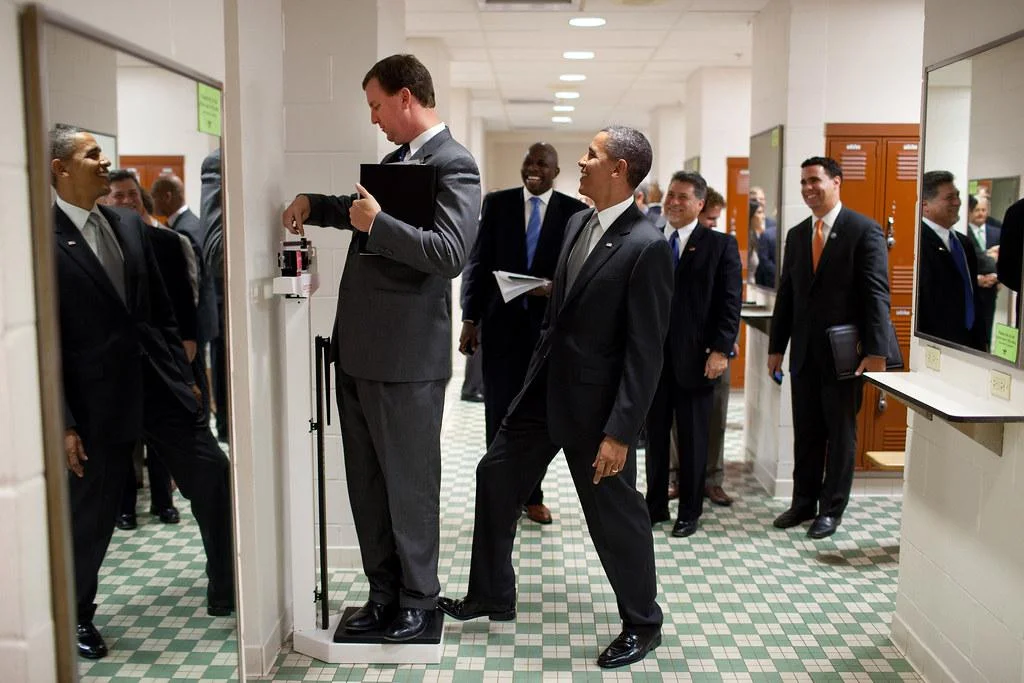

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math
from scipy.stats import f_oneway

# Two unpaired samples

In [5]:
np.random.seed(12)

minnesota_ages1 = stats.poisson.rvs(loc=18, mu=30, size=30)
minnesota_ages2 = stats.poisson.rvs(loc=18, mu=10, size=20)
minnesota_ages = np.concatenate((minnesota_ages1, minnesota_ages2))

wisconsin_ages1 = stats.poisson.rvs(loc=18, mu=33, size=30)
wisconsin_ages2 = stats.poisson.rvs(loc=18, mu=13, size=20)
wisconsin_ages = np.concatenate((wisconsin_ages1, wisconsin_ages2))

print( 'mean_wisconsin_ages: ', wisconsin_ages.mean() )
print( 'mean_minnesota_ages: ',minnesota_ages.mean() )
print('std_wisconsin_ages: ', wisconsin_ages.std() )
print( 'std_minnesota_ages: ',minnesota_ages.std() )

mean_wisconsin_ages:  42.26
mean_minnesota_ages:  40.1
std_wisconsin_ages:  10.430359533592311
std_minnesota_ages:  10.532331175955303


# Equal population variances (pooled-variances t test) vs Unequal population variances (Welch-Satterthwaite t test)


#Method 1 - Rule of thumb 
we can assume the populations have equal variances if the ratio of the larger sample variance to the smaller sample variance is less than 4:1

In [11]:
print('variance ratio: ', minnesota_ages.var() / wisconsin_ages.var() )


variance ratio:  1.019648431324247


# Method 2 - Run an F-test

In [14]:
alpha = 0.1

# possible types "right-tailed, left-tailed, two-tailed"
tail_hypothesis_type = "two-tailed"

if tail_hypothesis_type == "two-tailed":
    alpha /= 2

# calculate number of sample for both female and male
n1 = 50
n2 = 50

# calculate sample mean
x1_bar = np.mean(minnesota_ages)
x2_bar = np.mean(wisconsin_ages)

# calculate sample standard deviation => ddof = 1, population std => ddof = 0
s1 = np.std(minnesota_ages, ddof=1)
s2 = np.std(wisconsin_ages, ddof=1)

print("Basic Statistics from sample data")
print("Number of minnesota_ages sample:", n1, "Number of wisconsin_ages sample:", n2)
print("minnesota_ages pointing mean:", x1_bar, "wisconsin_ages pointing mean:", x2_bar)
print("minnesota_ages pointing std:", s1, "wisconsin_ages pointing std:", s2)

# Test statistics, on upper critical value
if s1 > s2:
    F_score = s1**2 / s2**2
    critical_value = stats.f.ppf(1-alpha, n1-1, n2-1)
else:
    F_score = s2**2 / s1**2
    critical_value = stats.f.ppf(1-alpha, n2-1, n1-1)

print("\n----------------------------TEST STATISTICS---------------------------------------------")
print("F-score is:", F_score, " and critical value is:", critical_value)
conclusion = "Failed to reject the null hypothesis : Populations Equal Variance."
t_test_type = "pooled_variance t test"
if F_score > critical_value:
    conclusion = "Null Hypothesis is rejected : Populations Unequal Variance."
    t_test_type = "separate-variances t test"
print(conclusion)


Basic Statistics from sample data
Number of minnesota_ages sample: 50 Number of wisconsin_ages sample: 50
minnesota_ages pointing mean: 40.1 wisconsin_ages pointing mean: 42.26
minnesota_ages pointing std: 10.639261137457828 wisconsin_ages pointing std: 10.536254223452682

----------------------------TEST STATISTICS---------------------------------------------
F-score is: 1.0196484313242473  and critical value is: 1.6072894627459253
Failed to reject the null hypothesis : Populations Equal Variance.


# Unpaired samples test (Equal or Unequal Pop_Var?)

In [12]:
stats.ttest_ind(a= minnesota_ages,
                b= wisconsin_ages,
                equal_var=True)    # Assume samples have equal variance?

Ttest_indResult(statistic=-1.0200339438711856, pvalue=0.31022389184190885)

# Two paired samples

In [ ]:
np.random.seed(11)

before= stats.norm.rvs(scale=30, loc=250, size=100)

after = before + stats.norm.rvs(scale=5, loc=-1.25, size=100)

weight_df = pd.DataFrame({"weight_before":before,
                          "weight_after":after,
                          "weight_change":after-before})

weight_df.describe()             # Check a summary of the data

,weight_before,weight_after,weight_change
count,100.000000,100.000000,100.000000
mean,250.345546,249.115171,-1.230375
std,28.132539,28.422183,4.783696
min,170.400443,165.913930,-11.495286
25%,230.421042,229.148236,-4.046211
50%,250.830805,251.134089,-1.413463
75%,270.637145,268.927258,1.738673
max,314.700233,316.720357,9.759282


# Paired samples test

In [ ]:
stats.ttest_rel(a = before,
                b = after)

Ttest_relResult(statistic=2.5720175998568284, pvalue=0.011596444318439857)

# ANNOVA

In [9]:
washangton_ages1 = stats.poisson.rvs(loc=30, mu=23, size=30)
washangton_ages2 = stats.poisson.rvs(loc=25, mu=13, size=20)
washangton_ages = np.concatenate((washangton_ages1, washangton_ages2))

f_oneway(minnesota_ages, wisconsin_ages, washangton_ages)


F_onewayResult(statistic=4.149774277883256, pvalue=0.017652852756359954)

# Extra: Pooled vs Welch and P-value vs t-stat

In [ ]:
import math

# possible types "right-tailed, left-tailed, two-tailed"
tail_hypothesis_type = "right-tailed"

print("Two-Sample", tail_hypothesis_type, "t-test for comparing two indepent populations")
print("t test type:", t_test_type)
print("--------------------------------------------------------------------------------------")

# The p-value approach
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
if (n1 >= 30 and n2 >= 30):
    print("Since n1 >= 30 and n2 >= 30, by CLT ")
    
    if t_test_type == "pooled_variance t test":
        sp2 = ((n1-1)*s1**2+(n2-1)*s2**2)/(n1+n2-2)
        # u1-u2 = 0, under H0: u1 = u2 
        t_score = (x1_bar-x2_bar)/math.sqrt(sp2*(1/n1+1/n2))

        if tail_hypothesis_type == "left-tailed":
            p_value = stats.t.cdf(t_score, n1+n2-2)
        elif tail_hypothesis_type == "right-tailed":
            p_value = 1 - stats.t.cdf(t_score, n1+n2-2) # or stats.norm.sf(t_score, n-1)
        else:
            t_score = abs(t_score)
            p_value = 1 - stats.t.cdf(t_score, n1+n2-2)

        conclusion = "Failed to reject the null hypothesis."
        if p_value <= alpha:
            conclusion = "Null Hypothesis is rejected."
    else:
        # u1-u2 = 0, under H0: u1 = u2 
        t_score = (x1_bar-x2_bar)/math.sqrt((s1**2/n1+s2**2/n2))
        df = (s1**2/n1+s2**2/n2)**2/((s1**2/n1)**2/(n1-1)+(s2**2/n2)**2/(n2-1))

        if tail_hypothesis_type == "left-tailed":
            p_value = stats.t.cdf(t_score, df)
        elif tail_hypothesis_type == "right-tailed":
            p_value = 1 - stats.t.cdf(t_score, df) # or stats.norm.sf(t_score, n-1)
        else:
            t_score = abs(t_score)
            p_value = 1 - stats.t.cdf(t_score, df)

        conclusion = "Failed to reject the null hypothesis."
        if p_value <= alpha:
            conclusion = "Null Hypothesis is rejected."

    print("t-score is:", t_score, " and p value is:", p_value)
    print(conclusion)
else:
    print("CLT is not satisfied")

# The critical value approach
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
if (n1 >= 30 and n2 >= 30):
    print("Since n1 >= 30 and n2 >= 30, by CLT ")
    
    if t_test_type == "pooled_variance t test":
        sp2 = ((n1-1)*s1**2+(n2-1)*s2**2)/(n1+n2-2)
        # u1-u2 = 0, under H0: u1 = u2 
        t_score = (x1_bar-x2_bar)/math.sqrt(sp2*(1/n1+1/n2))
        critical_value = stats.t.ppf(abs(alpha), n1+n2-2)
        
        conclusion = "Failed to reject the null hypothesis."
        if tail_hypothesis_type == "left-tailed":
            if t_score < critical_value:
                conclusion = "Null Hypothesis is rejected."
        elif tail_hypothesis_type == "right-tailed":
            critical_value = abs(critical_value)
            if t_score > critical_value:
                conclusion = "Null Hypothesis is rejected."
        else:
            t_score = abs(t_score) 
            critical_value = abs(critical_value)
            if t_score > critical_value:
                conclusion = "Null Hypothesis is rejected."
    else:
        # u1-u2 = 0, under H0: u1 = u2 
        t_score = (x1_bar-x2_bar)/math.sqrt((s1**2/n1+s2**2/n2))
        df = (s1**2/n1+s2**2/n2)**2/((s1**2/n1)**2/(n1-1)+(s2**2/n2)**2/(n2-1))
        critical_value = stats.t.ppf(abs(alpha), df)

        conclusion = "Failed to reject the null hypothesis."
        if tail_hypothesis_type == "left-tailed":
            if t_score < critical_value:
                conclusion = "Null Hypothesis is rejected."
        elif tail_hypothesis_type == "right-tailed":
            critical_value = abs(critical_value)
            if t_score > critical_value:
                conclusion = "Null Hypothesis is rejected."
        else:
            t_score = abs(t_score) 
            critical_value = abs(critical_value)
            if t_score > critical_value:
                conclusion = "Null Hypothesis is rejected."
    print("t-score is:", t_score, " and critical value is:", critical_value)
    print(conclusion)
else:
    print("CLT is not satisfied")